## Modeling Exploration Notebook

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle_online_retail import get_online_retail
from wrangle_online_retail import clean_online_retail
from wrangle_online_retail import feat_eng_online_retail
from wrangle_online_retail import prep_online_retail
from wrangle_online_retail import scale_online_retail

In [2]:
df = get_online_retail()
df = clean_online_retail(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df = feat_eng_online_retail(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,last_purchase,recency,frequency,sales_total,monetary,average_order_value,avg_items_ordered,unique_items_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,15.30,5391.21,18.152222,5.835017,21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,22.00,5391.21,18.152222,5.835017,21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-02 15:27:00,372,2970,20.34,5391.21,18.152222,5.835017,21


In [4]:
customer_df = prep_online_retail(df)
customer_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating
CustomerID,,,,,,,
12346.0,325,10,77183.60,77183.600000,74215.000000,1,0
12347.0,2,1820,4310.00,23.681319,13.505495,103,20
12348.0,75,310,1797.24,57.975484,75.516129,22,21
12349.0,18,730,1757.55,24.076027,8.643836,73,11
12350.0,310,170,334.40,19.670588,11.588235,17,13


<AxesSubplot:>

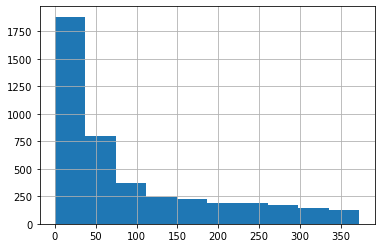

In [6]:
customer_df.recency.hist()

<AxesSubplot:>

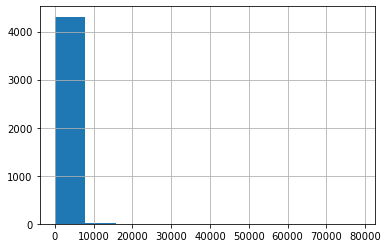

In [7]:
customer_df.frequency.hist()

In [10]:
customer_df.frequency.value_counts().sort_index()

10       72
20       53
30       55
40       48
50       72
         ..
27000     1
45960     1
51110     1
56770     1
78470     1
Name: frequency, Length: 461, dtype: int64

<AxesSubplot:>

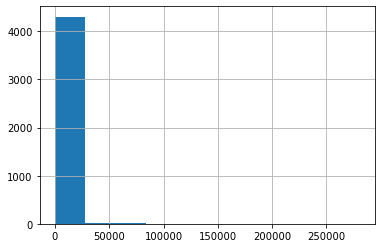

In [11]:
customer_df.monetary.hist()

<AxesSubplot:>

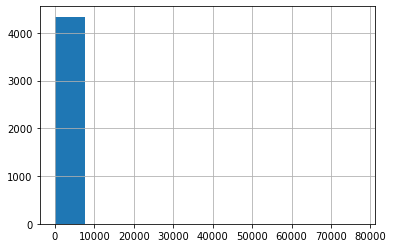

In [12]:
customer_df.average_order_value.hist()

In [13]:
customer_df.average_order_value.value_counts().sort_index()

0.000000        1
2.101286        1
2.150588        1
2.241000        1
2.264375        1
               ..
3861.000000     1
4453.430000     1
13305.500000    1
56157.500000    1
77183.600000    1
Name: average_order_value, Length: 4308, dtype: int64

In [5]:
scaled_modeling_df = scale_online_retail(customer_df)
scaled_modeling_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating
CustomerID,,,,,,,
12346.0,0.871314,0.000000,0.275453,1.000000,1.000000,0.000000,0.000000
12347.0,0.005362,0.023069,0.015382,0.000307,0.000169,0.056198,0.555556
12348.0,0.201072,0.003824,0.006414,0.000751,0.001004,0.011570,0.583333
12349.0,0.048257,0.009177,0.006272,0.000312,0.000103,0.039669,0.305556
12350.0,0.831099,0.002039,0.001193,0.000255,0.000143,0.008815,0.361111


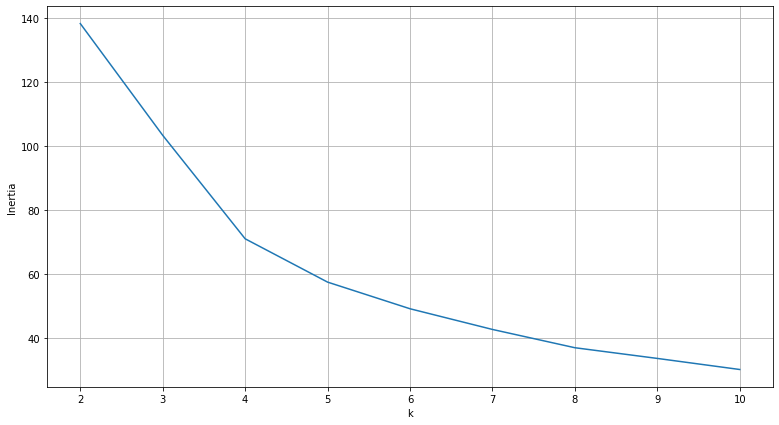

In [14]:
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(scaled_modeling_df)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(scaled_modeling_df)
customer_df['customer_cluster'] = kmeans.predict(scaled_modeling_df)


In [16]:
customer_df.head()

,recency,frequency,monetary,average_order_value,avg_items_ordered,unique_items_count,dist_rating,customer_cluster
CustomerID,,,,,,,,
12346.0,325,10,77183.60,77183.600000,74215.000000,1,0,1
12347.0,2,1820,4310.00,23.681319,13.505495,103,20,3
12348.0,75,310,1797.24,57.975484,75.516129,22,21,3
12349.0,18,730,1757.55,24.076027,8.643836,73,11,3
12350.0,310,170,334.40,19.670588,11.588235,17,13,1


(0.0, 400.0)

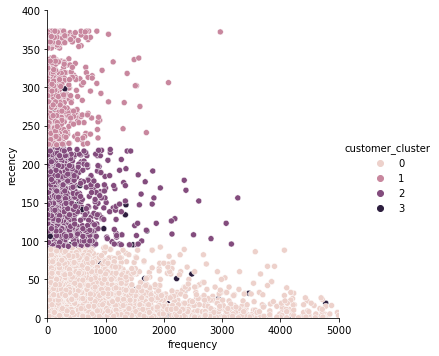

In [71]:
sns.relplot(data=customer_df, y='recency', x='frequency', hue='customer_cluster')
plt.xlim(0, 5000)
plt.ylim(0, 400)



(0.0, 400.0)

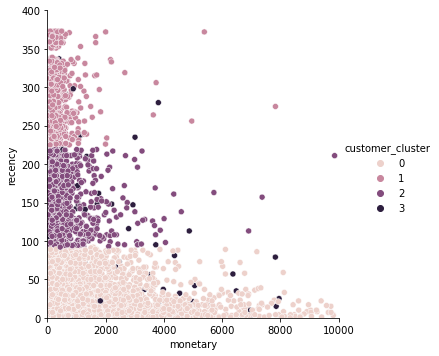

In [73]:
sns.relplot(data=customer_df, y='recency', x='monetary', hue='customer_cluster')
plt.xlim(0, 10000)
plt.ylim(0, 400)



(0.0, 10000.0)

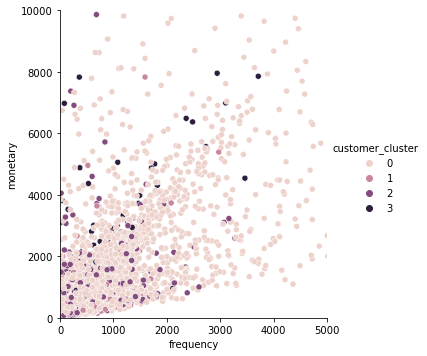

In [76]:
sns.relplot(data=customer_df, y='monetary', x='frequency', hue='customer_cluster')
plt.xlim(0, 5000)
plt.ylim(0, 10000)



(0.0, 200.0)

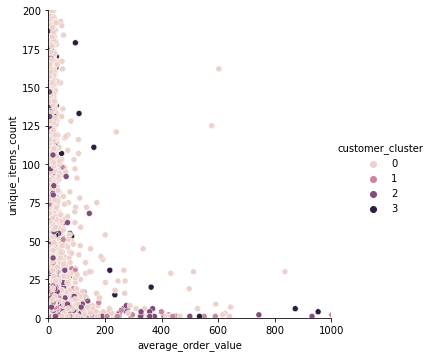

In [80]:
sns.relplot(data=customer_df, y='unique_items_count', x='average_order_value', hue='customer_cluster')
plt.xlim(0, 1000)
plt.ylim(0, 200)



(0.0, 10000.0)

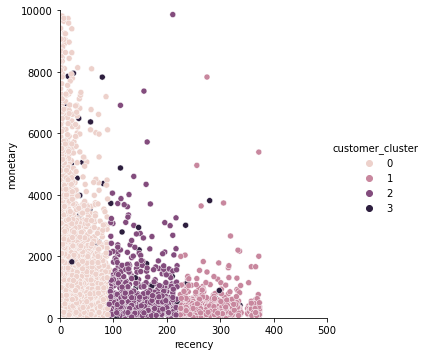

In [82]:
sns.relplot(data=customer_df, y='monetary', x='recency', hue='customer_cluster')
plt.xlim(0, 400)
plt.ylim(0, 10000)



In [18]:
customer_df.customer_cluster.value_counts()

0    2802
2     778
1     616
3     143
Name: customer_cluster, dtype: int64

In [19]:
cust_group_1 = customer_df[customer_df['customer_cluster'] == 0]
cust_group_2 = customer_df[customer_df['customer_cluster'] == 1]
cust_group_3 = customer_df[customer_df['customer_cluster'] == 2]
cust_group_4 = customer_df[customer_df['customer_cluster'] == 3]
cust_group_1.shape, cust_group_2.shape, cust_group_3.shape, cust_group_4.shape

((2802, 8), (616, 8), (778, 8), (143, 8))

In [20]:
cust_group_1.recency.mean()

31.468236973590294

In [26]:
cust_group_2.recency.mean()

294.3181818181818

In [27]:
cust_group_3.recency.mean()

153.086118251928

In [28]:
cust_group_4.recency.mean()

75.47552447552448

In [23]:
cust_group_1.frequency.mean()

1215.4139900071377

In [29]:
cust_group_2.frequency.mean()

237.12662337662337

In [30]:
cust_group_3.frequency.mean()

405.5784061696658

In [31]:
cust_group_4.frequency.mean()

783.4965034965035

In [24]:
cust_group_1.monetary.mean()

2662.5403543897182

In [32]:
cust_group_2.monetary.mean()

599.0645941558444

In [33]:
cust_group_3.monetary.mean()

783.7239858611822

In [34]:
cust_group_4.monetary.mean()

3302.1593006993016

In [35]:
cust_group_1.average_order_value.mean()

50.75269678669778

In [36]:
cust_group_2.average_order_value.mean()

166.0150333069358

In [37]:
cust_group_3.average_order_value.mean()

57.3455027511951

In [38]:
cust_group_4.average_order_value.mean()

50.912183053830645

In [39]:
cust_group_1.avg_items_ordered.mean()

32.59514061271178

In [40]:
cust_group_2.avg_items_ordered.mean()

140.8681919294415

In [41]:
cust_group_3.avg_items_ordered.mean()

33.24428650897842

In [42]:
cust_group_4.avg_items_ordered.mean()

28.32672164832335

In [43]:
cust_group_1.unique_items_count.mean()

78.26623840114205

In [44]:
cust_group_2.unique_items_count.mean()

21.75

In [45]:
cust_group_3.unique_items_count.mean()

34.580976863753214

In [46]:
cust_group_4.unique_items_count.mean()

60.77622377622377

In [48]:
cust_group_1.dist_rating.value_counts()

0     2624
6       70
3       62
4       15
7       11
5        6
8        4
2        4
10       3
1        2
9        1
Name: dist_rating, dtype: int64

In [49]:
cust_group_2.dist_rating.value_counts()

0     558
3      15
6      10
14      5
4       5
11      4
7       4
8       3
12      2
18      2
2       2
13      1
15      1
24      1
5       1
22      1
17      1
Name: dist_rating, dtype: int64

In [50]:
cust_group_3.dist_rating.value_counts()

0     739
6      14
3      10
7       4
2       3
4       2
8       2
5       2
12      1
1       1
Name: dist_rating, dtype: int64

In [51]:
cust_group_4.dist_rating.value_counts()

12    26
14    14
21    12
11    10
13     9
34     9
33     8
22     7
15     7
10     6
16     6
29     4
30     4
36     4
23     3
18     2
27     2
19     2
26     2
25     1
32     1
31     1
28     1
35     1
20     1
Name: dist_rating, dtype: int64

In [89]:
#Df.groupby([‘customer_cluster’]).whatever_col.mean()
#df.groupby(‘cluster’).describe()
customer_group_characteristics = customer_df.groupby('customer_cluster')[['recency', 'frequency', 'monetary', 
                                         'average_order_value', 'avg_items_ordered', 'unique_items_count']].mean()
customer_group_characteristics = 